# Analysis of succesfull actor profiles of over time
A successfull actor profile is defined as the actor profile of the most successfull actors in a certain genre. For simplicity and staying interesting, we have selected certain genres: ```...```. An actor profile is a subset of actor features. To limit ourselves, we have only consider these actor features: ```gender```, ```age_at_movie_start``` and```experience_at_movie_start``` (in total and for each selected genre respectively). An actor's successfullness is determined by the ordering he or she has in the cast (see column: 'ordering' in IMDB's principals data) as well as by the success of the movie the actor is playing in. As a movie success metric both - IMDB's ratings and revenue - are used.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading in and preparing preprocessed data

In [14]:
# import movie and actor data
movie_actor_combi = pd.read_csv("./data/actor_movie_combi.csv")
movie_actor_combi # note: only actors with importance to the respective movieare considered. The importance is determined by IMDB itself and stored in "ordering" column

,Unnamed: 0,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far
0,0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0
1,1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0
2,2,tt0000007,1,nm0179163,0,James J. Corbett,1866.0,1933,1894.0,"Short,Sport",1933.0,28.0,5.4,797.0,0
3,3,tt0000007,2,nm0183947,0,Peter Courtney,1867.0,1896,1894.0,"Short,Sport",1896.0,27.0,5.4,797.0,0
4,4,tt0000008,1,nm0653028,0,Fred Ott,1860.0,1936,1894.0,"Documentary,Short",1936.0,34.0,5.4,2069.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698941,20986391,tt9916406,1,nm0682935,0,Ryszard Pietruski,1922.0,1996,1976.0,Crime,1996.0,54.0,5.8,5.0,34
698942,20986392,tt9916406,2,nm0468565,0,August Kowalczyk,1921.0,2012,1976.0,Crime,2012.0,55.0,5.8,5.0,23
698943,20986393,tt9916406,3,nm0387710,0,Zygmunt Hobot,1930.0,2004,1976.0,Crime,2004.0,46.0,5.8,5.0,3
698944,20986395,tt9916406,9,nm0926802,0,Kazimierz Wichniarz,1915.0,1995,1976.0,Crime,1995.0,61.0,5.8,5.0,13


In [15]:
# add startDecade column to prepare data over time
movie_actor_combi["startDecade"] = movie_actor_combi["startYear"]/10
movie_actor_combi["startDecade"] = movie_actor_combi["startDecade"].astype('int')*10

movie_actor_combi

,Unnamed: 0,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far,startDecade
0,0,tt0000005,1,nm0443482,0,Charles Kayser,1878.0,1966,1893.0,"Comedy,Short",1966.0,15.0,6.2,2554.0,0,1890
1,1,tt0000005,2,nm0653042,0,John Ott,1850.0,1931,1893.0,"Comedy,Short",1931.0,43.0,6.2,2554.0,0,1890
2,2,tt0000007,1,nm0179163,0,James J. Corbett,1866.0,1933,1894.0,"Short,Sport",1933.0,28.0,5.4,797.0,0,1890
3,3,tt0000007,2,nm0183947,0,Peter Courtney,1867.0,1896,1894.0,"Short,Sport",1896.0,27.0,5.4,797.0,0,1890
4,4,tt0000008,1,nm0653028,0,Fred Ott,1860.0,1936,1894.0,"Documentary,Short",1936.0,34.0,5.4,2069.0,0,1890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698941,20986391,tt9916406,1,nm0682935,0,Ryszard Pietruski,1922.0,1996,1976.0,Crime,1996.0,54.0,5.8,5.0,34,1970
698942,20986392,tt9916406,2,nm0468565,0,August Kowalczyk,1921.0,2012,1976.0,Crime,2012.0,55.0,5.8,5.0,23,1970
698943,20986393,tt9916406,3,nm0387710,0,Zygmunt Hobot,1930.0,2004,1976.0,Crime,2004.0,46.0,5.8,5.0,3,1970
698944,20986395,tt9916406,9,nm0926802,0,Kazimierz Wichniarz,1915.0,1995,1976.0,Crime,1995.0,61.0,5.8,5.0,13,1970


## Creating weights based on different success metrics for movies for actor profile analysis
To incooperate success of movies into actor profile analysis and thus making it interesting for producers who seek a cast which create successfull movies.

Used weights:
1. no weight
2. numVotes (= popularity/trendingness)
3. imdb score (= opinion)
4. 0.8 * numVotes + 0.2 imdb score (= considering opinion of viewers and overall popularity with an emphasis on opinion)

In [35]:
# creating a column for "opinion and popularity" success metric
movie_actor_combi["opinion_and_success"] = 0.8 * movie_actor_combi["averageRating"] + 0.2 * movie_actor_combi["numVotes"]

In [37]:
# function for creating weighted average
def weighted_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()

In [68]:
# computing (weighted) averages for ever actor feature
# TODO add experience per genre
def applyOnDecade(x):
    d = {}
    d["avg_gender"] = x["gender"].mean()
    d["avg_gender_numVotes_wght"] = weighted_average(x, "gender", "numVotes")
    d["avg_gender_averageRating_wght"] = weighted_average(x, "gender", "averageRating")
    d["avg_gender_opinion_and_success_wght"] = weighted_average(x, "gender", "opinion_and_success")

    d["avg_age_at_movie_start"] = x["age_at_movie_start"].mean()
    d["avg_age_at_movie_start_numVotes_wght"] = weighted_average(x, "age_at_movie_start", "numVotes")
    d["avg_age_at_movie_start_averageRating_wght"] = weighted_average(x, "age_at_movie_start", "averageRating")
    d["avg_age_at_movie_start_opinion_and_success_wght"] = weighted_average(x, "age_at_movie_start", "opinion_and_success")

    d["avg_exp_so_far"] = x["exp_so_far"].mean()
    d["avg_exp_so_far_numVotes_wght"] = weighted_average(x, "exp_so_far", "numVotes")
    d["avg_exp_so_far_averageRating_wght"] = weighted_average(x, "exp_so_far", "averageRating")
    d["avg_exp_so_far_opinion_and_success_wght"] = weighted_average(x, "exp_so_far", "opinion_and_success")

    return pd.Series(d, index=[
        "avg_gender", "avg_gender_numVotes_wght", "avg_gender_averageRating_wght", "avg_gender_opinion_and_success_wght",
        "avg_age_at_movie_start", "avg_age_at_movie_start_numVotes_wght", "avg_age_at_movie_start_averageRating_wght", "avg_age_at_movie_start_opinion_and_success_wght",
        "avg_exp_so_far", "avg_exp_so_far_numVotes_wght", "avg_exp_so_far_averageRating_wght", "avg_exp_so_far_opinion_and_success_wght"
        ])
        
movie_actor_combi_per_decade = movie_actor_combi.groupby("startDecade").apply(applyOnDecade)
movie_actor_combi_per_decade

,avg_gender,avg_gender_numVotes_wght,avg_gender_averageRating_wght,avg_gender_opinion_and_success_wght,avg_age_at_movie_start,avg_age_at_movie_start_numVotes_wght,avg_age_at_movie_start_averageRating_wght,avg_age_at_movie_start_opinion_and_success_wght,avg_exp_so_far,avg_exp_so_far_numVotes_wght,avg_exp_so_far_averageRating_wght,avg_exp_so_far_opinion_and_success_wght
startDecade,,,,,,,,,,,,
1880,0.000000,0.000000,0.000000,0.000000,33.500000,25.008357,33.009346,25.194689,0.000000,0.000000,0.000000,0.000000
1890,0.205405,0.291618,0.221707,0.289331,34.313514,34.424525,34.229294,34.418137,16.464865,13.353937,17.051633,13.474915
1900,0.351087,0.288493,0.349011,0.293458,32.214381,30.966766,32.159321,31.064589,29.470928,19.280426,29.973675,20.157572
1910,0.330658,0.315569,0.331248,0.317423,33.734412,32.025195,33.762133,32.230487,30.121558,25.356099,29.575869,25.854843
1920,0.327946,0.295570,0.330252,0.297205,34.976148,35.582834,34.897129,35.550505,25.653835,17.590224,25.595828,17.967664
1930,0.346834,0.336971,0.347774,0.337369,36.106166,37.486688,36.044533,37.433491,21.361269,21.210275,21.258135,21.212041
1940,0.338598,0.328931,0.339062,0.329183,37.788662,38.323735,37.798262,38.310668,28.296817,26.081400,28.527600,26.142233
1950,0.270091,0.282758,0.266116,0.282101,40.291997,40.922736,40.436298,40.903524,56.120465,23.501747,59.673435,24.930357
1960,0.226805,0.218558,0.225393,0.218882,42.385339,42.306876,42.552692,42.318539,84.574800,28.460590,85.793868,31.180964


## Analysis of successfull actor profiles over time using different weights of movie success

In [69]:
# define array of names of actor features to run analysis automatically for every feature
# TODO add features: experience per genre (for each selected genre)
actor_features = ["gender", "age_at_movie_start", "exp_so_far"]
index = avg_gender_ordering_wght_per_decade["avg_gender"].index

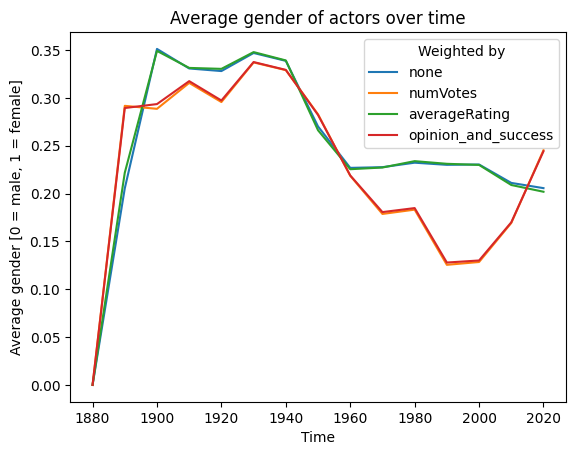

In [77]:
plt.plot(index, movie_actor_combi_per_decade["avg_gender"], label="none")
plt.plot(index, movie_actor_combi_per_decade["avg_gender_numVotes_wght"].values, label="numVotes")
plt.plot(index, movie_actor_combi_per_decade["avg_gender_averageRating_wght"].values, label="averageRating")
plt.plot(index, movie_actor_combi_per_decade["avg_gender_opinion_and_success_wght"].values, label="opinion_and_success")
plt.xlabel("Time")
plt.ylabel("Average gender [0 = male, 1 = female]")
plt.title("Average gender of actors over time")
plt.legend(title="Weighted by")
plt.show()

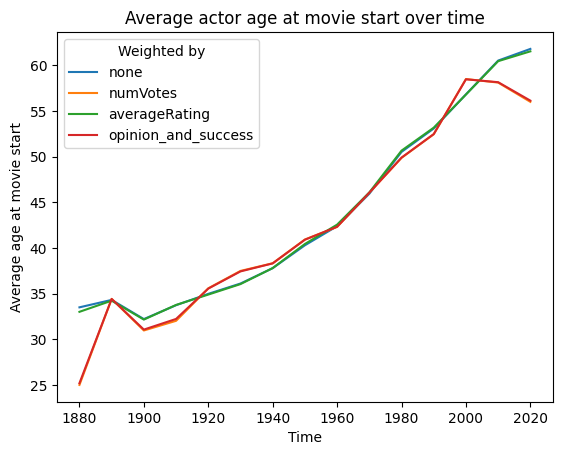

In [78]:
plt.plot(index, movie_actor_combi_per_decade["avg_age_at_movie_start"], label="none")
plt.plot(index, movie_actor_combi_per_decade["avg_age_at_movie_start_numVotes_wght"].values, label="numVotes")
plt.plot(index, movie_actor_combi_per_decade["avg_age_at_movie_start_averageRating_wght"].values, label="averageRating")
plt.plot(index, movie_actor_combi_per_decade["avg_age_at_movie_start_opinion_and_success_wght"].values, label="opinion_and_success")
plt.xlabel("Time")
plt.ylabel("Average age at movie start")
plt.title("Average actor age at movie start over time")
plt.legend(title="Weighted by")
plt.show()

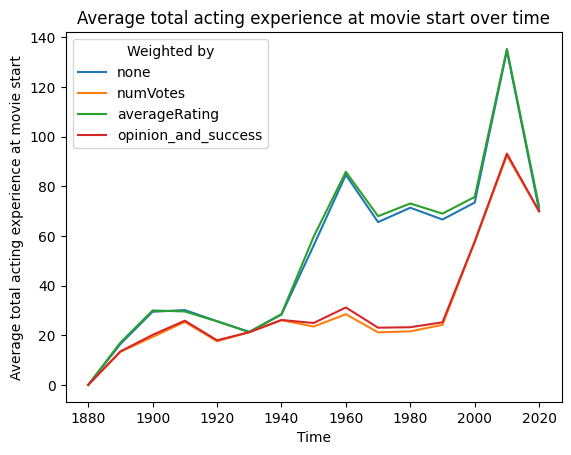

In [79]:
plt.plot(index, movie_actor_combi_per_decade["avg_exp_so_far"], label="none")
plt.plot(index, movie_actor_combi_per_decade["avg_exp_so_far_numVotes_wght"].values, label="numVotes")
plt.plot(index, movie_actor_combi_per_decade["avg_exp_so_far_averageRating_wght"].values, label="averageRating")
plt.plot(index, movie_actor_combi_per_decade["avg_exp_so_far_opinion_and_success_wght"].values, label="opinion_and_success")
plt.xlabel("Time")
plt.ylabel("Average total acting experience at movie start")
plt.title("Average total acting experience at movie start over time")
plt.legend(title="Weighted by")
plt.show()

In [80]:
# TODO plot for every actor feature over time with different lines for different used weights
# TODO reverse ordering so thaht ordering value of 1 is getting the highest points